# Optimal test calculation and visualization 

This notebook contains a demonstration of usage of the program code for  solution of the modified Kiefer-Weiss problem when sampling from a normal distribution. The usage example of the function *modified_kw* is provided, as well as  graphical presentation and calculation of characteristics (operating characteristic, average sample number, alpha and beta errors).

In [1]:
source("normal.R")
source("usage.R")
library(showtext)
showtext_auto()
require(ggplot2)

Loading required package: sysfonts
Loading required package: showtextdb
Loading required package: ggplot2


##  Step H - 1.

Let's find the first continuation interval in backward induction (step $H - 1$) corresponding to the following inequality

$$\min\{\lambda_0f_{\theta_0}^{H-1},\lambda_1f_{\theta_1}^{H-1}\}\geq
f_{\theta_{}}^{H-1}+\mathcal{I}V^H_{\theta, H}.$$

In [2]:
l0 = 621.0
l1 = 1042.0
th0 = -0.1
th1 = 0.1
th = -0.016
H = 300
precision = 0.05

In [3]:
# check for continuation before search for solution 
step_n_has_continuation(l0, l1, th0, th1, th, n=H - 1)

[1] TRUE

In [4]:
center_point = calc_center_bound(H - 1, th0, th1)
center_point

[1] -2.587831

In [5]:
# continuation interval
cont_int = find_first_continuation_interval(l0, l1, th0, th1, th, H - 1)
cont_int

[1] -4.098705 -1.055772

Graphical representation of the  obtained continuation interval and parts of the inequality:


$$FL := f_{\theta_{}}^{H-1}+\mathcal{I}V^H_{\theta, H}\quad\text{(future loss)} $$
$$CL := \min\{\lambda_0f_{\theta_0}^{H-1},\lambda_1f_{\theta_1}^{H-1}\}\quad\text{(current loss)}$$


As we can see, the continuation interval coincides with the region  where $FL\leq CL$.

The definition of $\mathcal{I}V^H_{\theta, n}$ could be found in formulas $(3) - (5)$ in [this article](https://arxiv.org/abs/2203.13957).

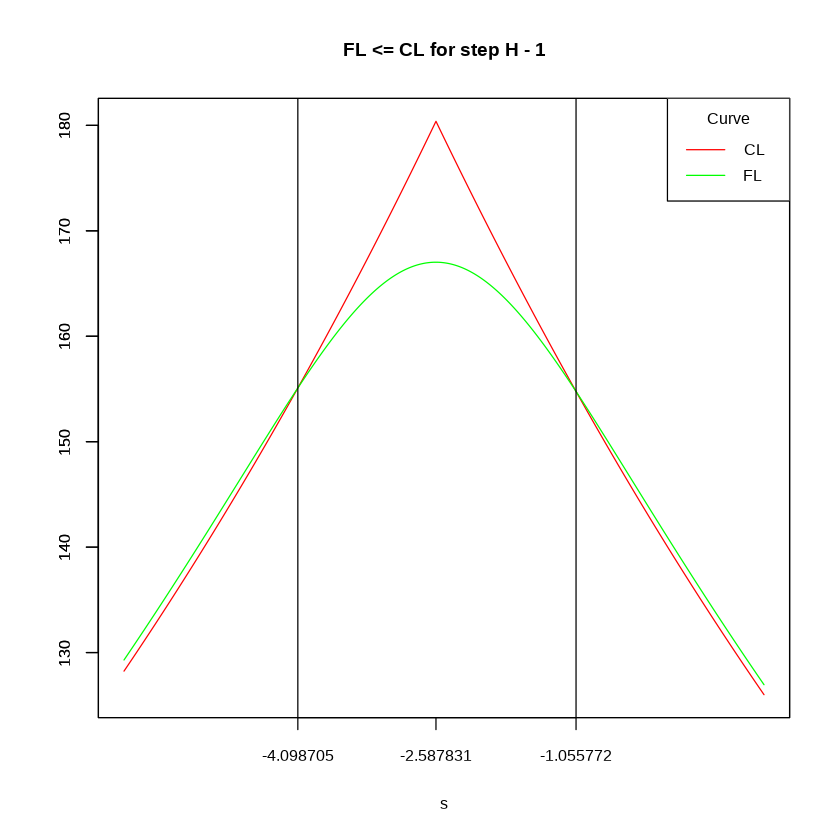

In [6]:
current_loss <- function(s){ min(l0 * d(s,th0, H - 1), l1 * d(s, th1, H - 1)) }
future_loss <- function(s){ d(s, th, H - 1) + L(s, l0, l1, th0, th1, H) }


x  <- seq(-6, 1, length.out=1000)
y1 <- sapply(x, current_loss)
y2 <- sapply(x, future_loss)

mn = min(min(y1), min(y2))
mx = max(max(y1), max(y2))


plot(x,y1,ylim=c(mn,mx), type="l",  main="FL <= CL for step H - 1", xlab="s", ylab="", col="red", xaxt = "n")
axis(1, at = c(center_point, cont_int))
par(new=TRUE)
plot(x, y2, ylim=c(mn, mx), type="l", main="", xlab="", ylab="", , col="green", xaxt = "n")
abline(v = cont_int[1])
abline(v = cont_int[2])
legend("topright", legend=c("CL","FL"), col= c("red","green"), title="Curve", lty = c(1,1))


## Using `modified_kw`

The optimal test for the modified Kiefer-Weiss problem calculation by calling `modified_kw` function.

In [7]:
# input parameters can be changed here
l0 = 621.0
l1 = 1042.0
th0 = -0.1
th1 = 0.1
th = -0.016
H = 846
precision = 0.05

test = modified_kw(l0, l1, th0, th1, th, H, precision, print_output=FALSE)

summary(test)

     Length Class  Mode
info   7    -none- list
data 846    -none- list

In [8]:
cat("The structure of the test elements:", end="\n")
print(summary(test$data[[1]]))


cat("--------------------------------------", end="\n")
cat("The structure of the test last element:", end="\n")
real_H = test[["info"]]$H
print(summary(test$data[[real_H]]))

The structure of the test elements: 
     Length Class  Mode   
n      1    -none- numeric
grid 675    -none- numeric
val  675    -none- numeric
-------------------------------------- 
The structure of the test last element: 
      Length Class  Mode   
n     1      -none- numeric
const 1      -none- numeric
grid  1      -none- numeric
val   1      -none- logical


In [9]:
# The acceptance constant
acceptance_constant = test$data[[real_H]]$const
acceptance_constant

[1] -2.587831

## Step n. Continuation interval and values curve 

Let us consider now the  inequality defining the optimal continuation at any step $n$


$$\min\{\lambda_0f_{\theta_0}^{n},\lambda_1f_{\theta_1}^{n}\}\geq
f_{\theta_{}}^{n}+\mathcal{I}V^H_{\theta, n + 1}$$


and  show the  curves defining the  continuation region


$$FL := f_{\theta_{}}^{n}+\mathcal{I}V^H_{\theta, n + 1} \quad\text{(future loss)}$$
$$CL := \min\{\lambda_0f_{\theta_0}^{n},\lambda_1f_{\theta_1}^{n}\} \quad\text{(current loss)}$$

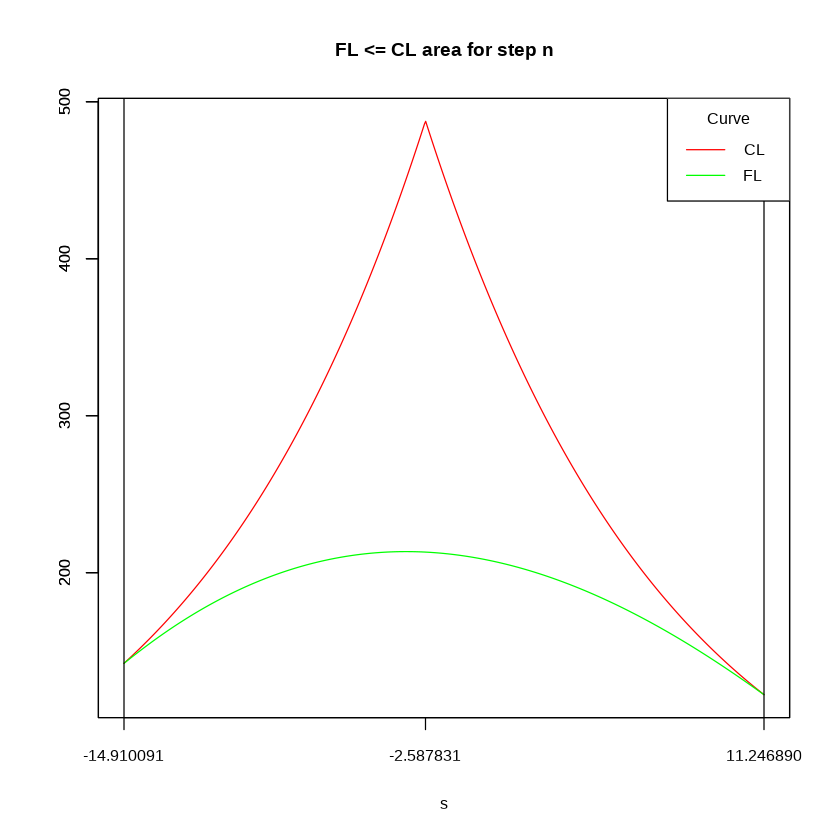

In [10]:
# The  number of  step n to show can be set here
n = 100

current_loss<-function(s){ min(l0 * d(s, th0, n), l1 * d(s, th1, n)) }

cont_int = c(head(test$data[[n]]$grid, 1), tail(test$data[[n]]$grid, 1))
center_point = calc_center_bound(n, th0, th1)

x  <- test$data[[n]]$grid
y1 <- sapply(x, current_loss)
y2 <- test$data[[n]]$val

mn = min(min(y1), min(y2))
mx = max(max(y1), max(y2))


plot(x,y1,ylim=c(mn,mx), type="l",  main="FL <= CL area for step n", xlab="s", ylab="", col="red", xaxt = "n")
axis(1, at = c(center_point, cont_int))
par(new=TRUE)
plot(x, y2, ylim=c(mn, mx), type="l", main="", xlab="", ylab="", , col="green", xaxt = "n")
abline(v = cont_int[1])
abline(v = cont_int[2])
legend("topright", legend=c("CL","FL"), col= c("red","green"), title="Curve", lty = c(1,1))

## Continuation intervals over all steps in the obtained test

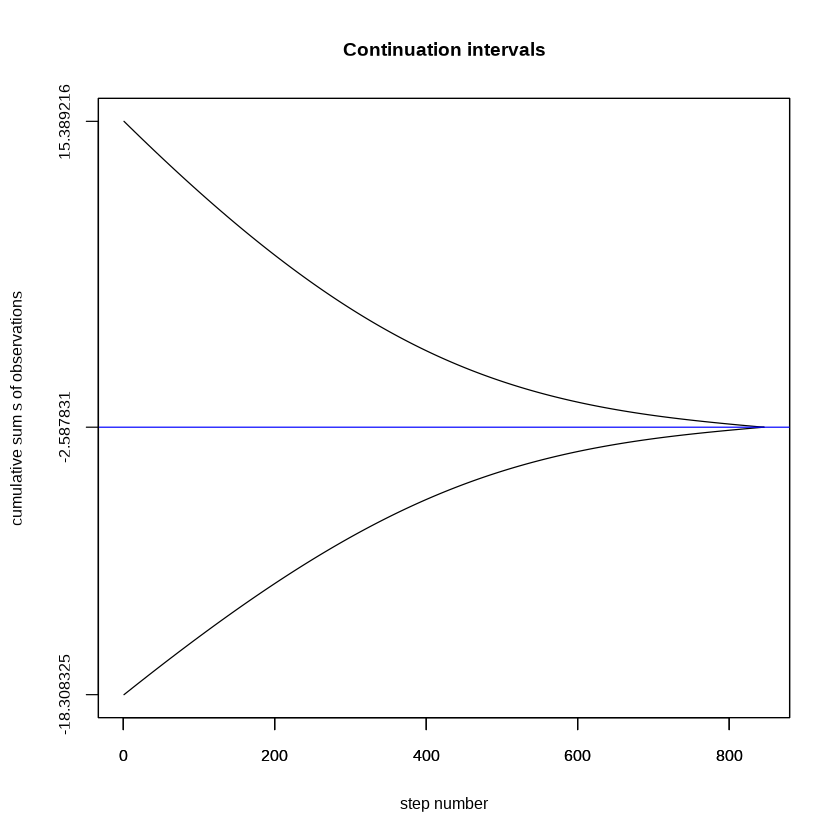

In [11]:
x = y = z = seq(1, real_H)

for(i in 1:real_H){
y[i] = head(test$data[[i]]$grid, 1)
z[i] = tail(test$data[[i]]$grid, 1)
}

mn = min(y)
mx = max(z)

plot(x, y, ylim=c(mn,mx), type="l", yaxt="n",
     main="Continuation intervals", 
     xlab="step number", 
     ylab="cumulative sum s of observations")

par(new=TRUE)
plot(x, z, ylim=c(mn, mx), type="l", main="", xlab="", ylab="", yaxt="n")

abline(h = acceptance_constant, col="blue")
axis(2, at = c(acceptance_constant, mx, mn))

## Test summary

 The following characteristics reported: operating characteristic, average sample number, alpha and beta errors.

In [12]:
results = modified_kw_summary(test, l0, l1, th0, th1, th)
print(results)

$lambda0
[1] 621

$lambda1
[1] 1042

$theta0
[1] -0.1

$theta1
[1] 0.1

$theta
[1] -0.016

$H
[1] 846

$alpha
[1] 0.1003541

$beta
[1] 0.04998435

$ASN
[1] 150.0484

$ASN0
[1] 123.2027

$ASN1
[1] 105.3386

$quantile
[1] 346

$acceptance_constant
[1] -2.587831

